In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [68]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppresses INFO and WARNING logs from TensorFlow

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [70]:
import os
import cv2
import numpy as np

X_train = [] 
Y_train = [] 
image_size = 224
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Load training data
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))  # fixed imread
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            Y_train.append(i)

# Load testing data
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))  # fixed imread
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)




In [71]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle 
import tensorflow as tf

In [72]:
from sklearn.utils import shuffle

# Shuffle the dataset
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

# Check shape
print(X_train.shape)


(3264, 224, 224, 3)


In [73]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

# Optional: Check the shape
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (2937, 224, 224, 3)
Test set: (327, 224, 224, 3)


In [40]:
print(y_train[:5])


['glioma_tumor' 'meningioma_tumor' 'meningioma_tumor' 'glioma_tumor'
 'pituitary_tumor']


In [74]:


# Define your label list
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Convert string labels to numeric only if they are still strings
if isinstance(y_train[0], str):
    y_train = [labels.index(i) for i in y_train]
    y_test = [labels.index(i) for i in y_test]

# One-hot encode
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=len(labels))
Y_test = to_categorical(y_test, num_classes=len(labels))


In [75]:
model =Sequential()
model.add(Conv2D(32,(3,3),activation ='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0,3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(120,(3,3),activation='relu'))
model.add(Conv2D(120,(3,3),activation='relu'))
model.add(Conv2D(120,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(120,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Flatten())
model.add(Dense(512,activation ='relu'))
model.add(Dense(512,activation ='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))




In [76]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 32, 32, 120)    │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 30, 30, 120)    │       129,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 28, 28, 120)    │       129,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 14, 14, 120)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 14, 14, 120)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 12, 12, 120)    │       129,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 10, 10, 256)    │       276,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,370,404 (16.67 MB)

 Trainable params: 4,370,404 (16.67 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [77]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load training and validation datasets (update 'your_dataset_path')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-tumor-classification-mri/Training',
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-tumor-classification-mri/Training',
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)

# Define the model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=20)


Found 2870 files belonging to 4 classes.
Found 2870 files belonging to 4 classes.
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.4842 - loss: 1.1612 - val_accuracy: 0.7540 - val_loss: 0.6282
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7623 - loss: 0.5882 - val_accuracy: 0.8794 - val_loss: 0.3478
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8709 - loss: 0.3607 - val_accuracy: 0.9233 - val_loss: 0.2188
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9258 - loss: 0.2075 - val_accuracy: 0.9411 - val_loss: 0.1574
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9467 - loss: 0.1348 - val_accuracy: 0.9746 - val_loss: 0.0801
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9806 - loss: 0.0493 - val_accuracy: 0.9756 - val_loss: 0.0691
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9764 - loss: 0.0610 - val_accuracy: 0.9829 - val_loss: 0.0417
Epoch 8/20
90/90 ━━━━━━━━━━━━

In [78]:
print(type(X_train))
print(X_train[:5])  # or df.head() if it's a DataFrame


<class 'numpy.ndarray'>
[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [

In [79]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-tumor-classification-mri/Training',  # ✅ correct string
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-tumor-classification-mri/Training',
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)


Found 2870 files belonging to 4 classes.
Using 2583 files for training.
Found 2870 files belonging to 4 classes.
Using 287 files for validation.


In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

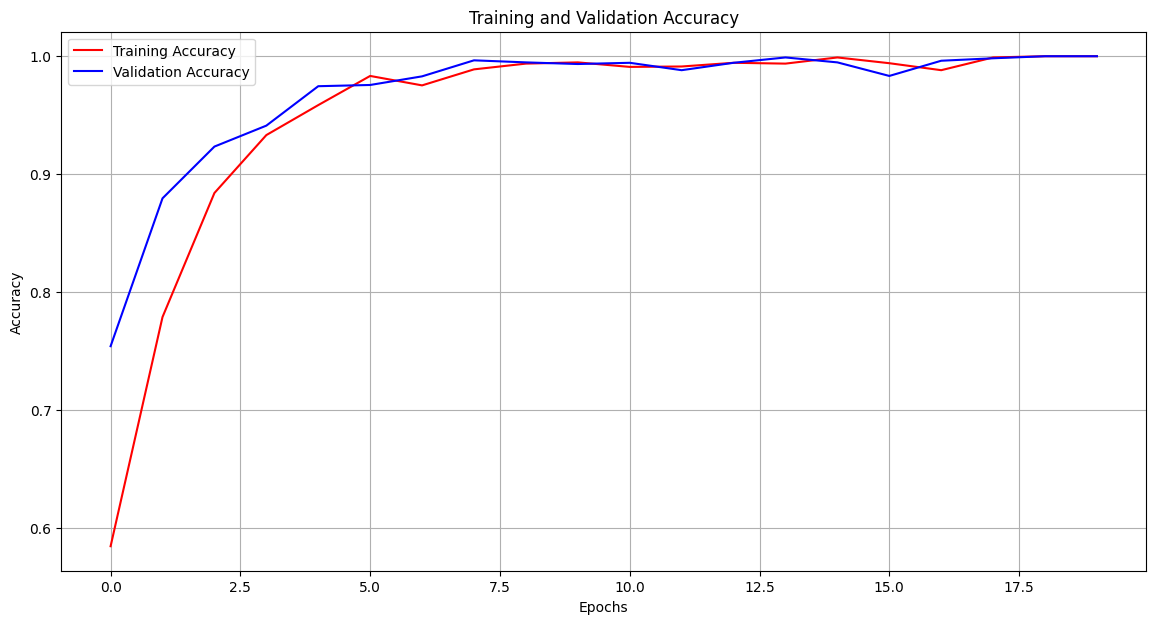

In [81]:
# Save the trained model
import matplotlib.pyplot as plt

# Plotting accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14, 7))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')  # Changed to 'b' for better distinction
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [83]:
import matplotlib.pyplot

In [94]:
import cv2
import numpy as np

img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (101).jpg')
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
print(img_array.shape)


(150, 150, 3)


In [86]:
img_array =img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

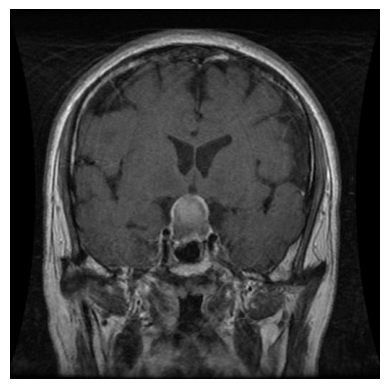

In [95]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the image
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (101).jpg')


# Display it
plt.imshow(img)
plt.axis('off')  # Optional: hides the axis
plt.show()


In [96]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load trained model
model = load_model('braintumor.h5')

# Step 1: Load and resize image to match model input
img_path = ('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (101).jpg')
img = image.load_img(img_path, target_size=(128, 128))

# Step 2: Convert image to array and normalize
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Step 3: Predict
print("Model input shape:", model.input_shape)
print("Image input shape:", img_array.shape)

a = model.predict(img_array)
indices = a.argmax()

# Step 4: Print class
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
print("Predicted class:", labels[indices])



Model input shape: (None, 128, 128, 3)
Image input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
Predicted class: pituitary_tumor


In [97]:
model.save('/kaggle/working/braintumor.h5')


In [90]:
import os
from collections import Counter

train_dir = "/kaggle/input/brain-tumor-classification-mri/Training"
classes = os.listdir(train_dir)
class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in classes}
print(class_counts)


{'no_tumor': 395, 'pituitary_tumor': 827, 'meningioma_tumor': 822, 'glioma_tumor': 826}


In [91]:
print("Raw prediction:", a)
print("Predicted index:", indices)
print("Predicted class:", labels[indices])


Raw prediction: [[0.27609774 0.25302875 0.19471678 0.27615672]]
Predicted index: 3
Predicted class: pituitary_tumor


In [99]:
for i, score in enumerate(a[0]):
    print(f"{labels[i]}: {score:.4f}")


glioma_tumor: 0.2761
meningioma_tumor: 0.2530
no_tumor: 0.1947
pituitary_tumor: 0.2762


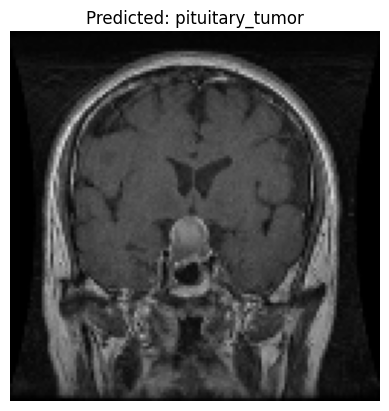

In [98]:
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {labels[indices]}")
plt.show()
